### Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import helpers

### Load the training and testing data

In [2]:
#image data directories
image_dir_training = "images/day_night_images/training"
image_dir_testing = "images/day_night_images/testing"

#load in the training data with the help function in helpers.py
image_list = helpers.load_dataset(image_dir_training)

### Visualize the input images

day


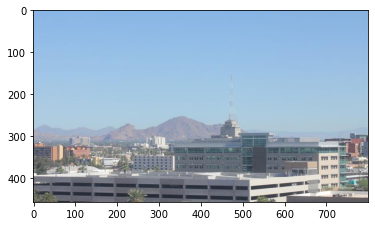

In [3]:
#select an index and print out the image and its label
image_index = 14
selected_image = image_list[image_index][0]
selected_label = image_list[image_index][1]

plt.imshow(selected_image)
print(selected_label)

### Pre-process the data

In [4]:
#this function takes in an RGB image and return its standardized version(600x1100)
def standardize_input(image):
    standard_img = image[0:600,0:1100]
    return standard_img


### Encode the label

In [5]:
#this function encodes the label of the data(0: night, 1: day)
def encode(label):
    numerical_value = 0
    if label == 'day':
        numerical_value = 1
    return numerical_value

### Construct a standardized list of input images and outputs labels

In [6]:
#this function returns a standardized list 
def standardize(image_list):
    standard_list = []

    #iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        #standardize the image
        standardized_im = standardize_input(image)

        #encode the label of the image
        binary_label = encode(label)

        #append the completed image to the standard list
        standard_list.append((standardized_im, binary_label))
    return standard_list

standardized_list = standardize(image_list)
print(standardized_list)

[(array([[[158, 194, 218],
        [158, 194, 218],
        [158, 194, 218],
        ...,
        [176, 209, 228],
        [177, 210, 229],
        [177, 210, 229]],

       [[158, 194, 218],
        [158, 194, 218],
        [158, 194, 218],
        ...,
        [180, 213, 232],
        [180, 213, 232],
        [180, 213, 232]],

       [[158, 194, 218],
        [158, 194, 218],
        [158, 194, 218],
        ...,
        [177, 210, 229],
        [177, 210, 229],
        [177, 210, 229]],

       ...,

       [[ 35,  40,  43],
        [ 38,  43,  46],
        [ 39,  44,  47],
        ...,
        [ 65,  73,  75],
        [ 65,  73,  75],
        [ 65,  73,  75]],

       [[ 36,  41,  44],
        [ 38,  43,  46],
        [ 39,  44,  47],
        ...,
        [ 68,  76,  78],
        [ 68,  76,  78],
        [ 65,  73,  75]],

       [[ 37,  41,  44],
        [ 38,  43,  46],
        [ 39,  44,  47],
        ...,
        [ 68,  76,  78],
        [ 68,  76,  78],
        [ 65,  73,  75

### Visualize the standardized data

1


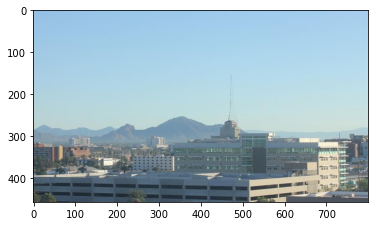

In [7]:
#Display a standardized image and its label

image_num = 1
selected_image = standardized_list[image_num][0]
selected_label = standardized_list[image_num][1]

plt.imshow(selected_image)
print(selected_label)



# Feature Extraction

### RGB to HSV conversion

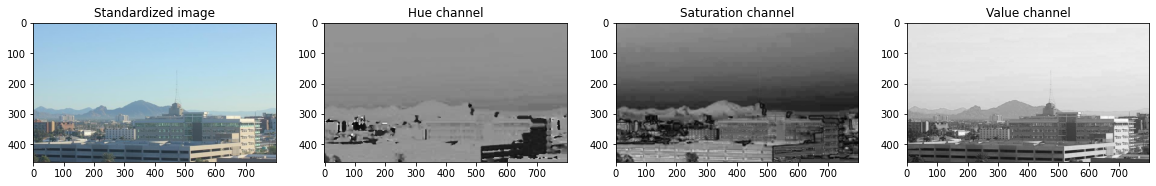

In [13]:
#Convert the image from RGB to HSV to see the brightness difference
image_copy = np.copy(selected_image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

#Extract the feature of HSV
h = image_copy[:,:,0]
s = image_copy[:,:,1]
v = image_copy[:,:,2]

#Plot the feature in each image
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(selected_image)
ax2.set_title('Hue channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('Saturation channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('Value channel')
ax4.imshow(v, cmap='gray')

### Average brightness using V channel

In [ ]:
#this function returns the avarage brightness per pixel in the image
def avg_brightness(rgb_image):

    #convert the image from standard rgb to hsv
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    #calculate the total brighness of the image
    sum_brightness = np.sum(hsv[:,:,2])

    #the size of the standardized image is 600x1100, so the total area would be:
    total_area = 600 * 1100

    return sum_brightness/total_area

### Testing the avarage brightness

In [ ]:
test_image = avg_brightness()